# Домашнее задание № 0
Вам необходимо провести анализ данных и с помощью него ответить на поставленные вопросы. 

# Исходные данные
Этот набор данных представляет собой описание около 1 миллиона треков с платформы Spotify. Скачайте датасет и ознакомьтесь с описанием данных в [источнике](https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks/data).

In [1]:
import pandas as pd

In [2]:
# Читаем данные
path = 'spotify_data.csv'
df = pd.read_csv(path, index_col=0)


In [3]:
df.sample(3).T

,1224994,587576,1074139
artist_name,Jill's Project,Helen Humes,Cristina Amaral
track_name,Heavy Rain Sheds Blood,It’s the Dreamer in Me,Fogo
track_id,0eFIFXIADNvq92RoMGxaXh,0RCiApefKXUwni5grFfiGR,5oQj2bcIOaAMyuYB2LNctq
popularity,0,0,0
year,2008,2023,2006
genre,heavy-metal,blues,forro
danceability,0.169,0.578,0.721
energy,0.959,0.182,0.695
key,8,0,2
loudness,-4.608,-11.232,-4.953


# Вопросы

## Анализ данных
С помощью работы с типом данных DataFrame из библиотеки pandas ответье на поставленные вопросы

In [4]:
# YOUR IMPORTS HERE
import numpy as np

### 1. Сколько уникальных исполнителей и сколько уникальных жанров содержится в датасете?

**Результат**: Код и текстовый ответ на вопрос в формате

```
Уникальных исполнителей: <ответ>
Уникальных жанров: <ответ>
```

In [5]:
# YOUR CODE HERE
unique_artists = df['artist_name'].nunique()
unique_genres = df['genre'].nunique()

print(f"Уникальных исполнителей: {unique_artists}")
print(f"Уникальных жанров: {unique_genres}")


Уникальных исполнителей: 64158
Уникальных жанров: 82


### 2. Есть ли в данных пропуски? Если да, предложите способ их заполнения и реализуйте его

**Результат**: Код и текстовый ответ на вопрос в формате

```
Для каждого столбца в таблице
<Название столбца> - <Сколько пропусков> - <Описание способа заполнения> (Если были пропуски)
```


In [6]:
missing_data = df.isnull().sum()
missing_results = []

for column, missing_count in missing_data.items():
    if missing_count > 0:
        if df[column].dtype in ['float64', 'int64']:
            # для числовых медиана
            fill_value = df[column].median()
        else:
            # для категориальных мода
            fill_value = df[column].mode()[0]

        df[column] = df[column].fillna(fill_value)
        missing_results.append(
            f"{column} - {missing_count} - Заменено на {'медиану' if df[column].dtype in ['float64', 'int64'] else 'моду'} ({fill_value})"
        )
    else:
        missing_results.append(f"{column} - {missing_count} - Пропусков нет")

print(*missing_results, sep='\n')


artist_name - 15 - Заменено на моду (Traditional)
track_name - 1 - Заменено на моду (Intro)
track_id - 0 - Пропусков нет
popularity - 0 - Пропусков нет
year - 0 - Пропусков нет
genre - 0 - Пропусков нет
danceability - 0 - Пропусков нет
energy - 0 - Пропусков нет
key - 0 - Пропусков нет
loudness - 0 - Пропусков нет
mode - 0 - Пропусков нет
speechiness - 0 - Пропусков нет
acousticness - 0 - Пропусков нет
instrumentalness - 0 - Пропусков нет
liveness - 0 - Пропусков нет
valence - 0 - Пропусков нет
tempo - 0 - Пропусков нет
duration_ms - 0 - Пропусков нет
time_signature - 0 - Пропусков нет


### 3. Есть ли признаки, которые не отвечают указанным в описании ограничениям? Если есть, то замените их

**Результат**: Код и текстовый ответ на вопрос в формате

```
Для каждого столбца в таблице
<Название столбца> - <Сколько не соответствующих ограничениям данных> - <Описание способа замены> (Если были некорректные данные)
```

In [7]:
results = []

limits = {
    "Popularity": (0, 100),
    "Year": (2000, 2023),
    "Danceability": (0.0, 1.0),
    "Energy": (0.0, 1.0),
    "Key": (0, 11), # видимо в таблице на кэгле ошибка, так как не должно быть здесь отрицательных значений
    "Loudness": (-60, 0),  # 1198 значений больше 0, но меньше 7
    "Mode": (0, 1),
    "Speechiness": (None, None),
    "Acousticness": (0.0, 1.0),
    "Instrumentalness": (0.0, 1.0),
    "Liveness": (0.0, 1.0),
    "Valence": (0.0, 1.0),
    "Tempo": (None, None),
    "Time_signature": (3, 7), # есть знчения 0 и 1, но нет 6, 7
    "Duration_ms": (0, None)
}

for column, (min_val, max_val) in limits.items():
    column = column.lower()
    if column in df.columns:
        if min_val is not None:
            mask_min = df[column] < min_val
        else:
            mask_min = pd.Series(False, index=df.index)

        if max_val is not None:
            mask_max = df[column] > max_val
        else:
            mask_max = pd.Series(False, index=df.index)

        invalid_count = mask_min.sum() + mask_max.sum()

        if invalid_count > 0:
            # print(df.loc[mask_min, column].value_counts().sort_index())
            # print(df.loc[mask_max, column].value_counts().sort_index())
            if min_val is not None:
                df.loc[mask_min, column] = min_val
            if max_val is not None:
                df.loc[mask_max, column] = max_val
            results.append(f"{column} - {invalid_count} - Заменено на ближайшее граничное значение")
        else:
            results.append(f"{column} - {invalid_count} - Все ок")
    else:
        results.append(f"{column} - 0 - Признак отсутствует")

print(*results, sep='\n')

popularity - 0 - Все ок
year - 0 - Все ок
danceability - 0 - Все ок
energy - 0 - Все ок
key - 0 - Все ок
loudness - 1198 - Заменено на ближайшее граничное значение
mode - 0 - Все ок
speechiness - 0 - Все ок
acousticness - 0 - Все ок
instrumentalness - 0 - Все ок
liveness - 0 - Все ок
valence - 0 - Все ок
tempo - 0 - Все ок
time_signature - 13888 - Заменено на ближайшее граничное значение
duration_ms - 0 - Все ок


## Визуальный анализ
Ответом на вопрос должен быть график или несколько графиков в одной фигуре (картинке), с минимальной подписью

In [8]:
# YOUR IMPORTS HERE
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm

### 1. Как Energy зависит от Danceability? Как зависит Loudness от Energy? Как эти параметры влияют на Valence?

**Результат**: Код, реализующий графики:

- Зависимость Energy от Danceability
- Зависимость Loudness от Energy
- Зависимость Valence от Energy, зависимость Valence от Danceability; в одной оси фигуры
- Зависимость Valence от Loudness
- Матрица корреляции Energy, Danceability, Loudness, Valence

Каждый график должен иметь название, подписанные оси и, при необходимости, легенду.

**Дополнительно**: Нарисовать стрелки и подписи к ним на графике, обращающие внимание на ключевые моменты, позволяющие сделать выводы о зависимостях. 

In [9]:
columns_to_analyze = ["energy", "danceability", "loudness", "valence"]
df_to_analyze = df[columns_to_analyze].copy()
columns_string = ", ".join(columns_to_analyze)

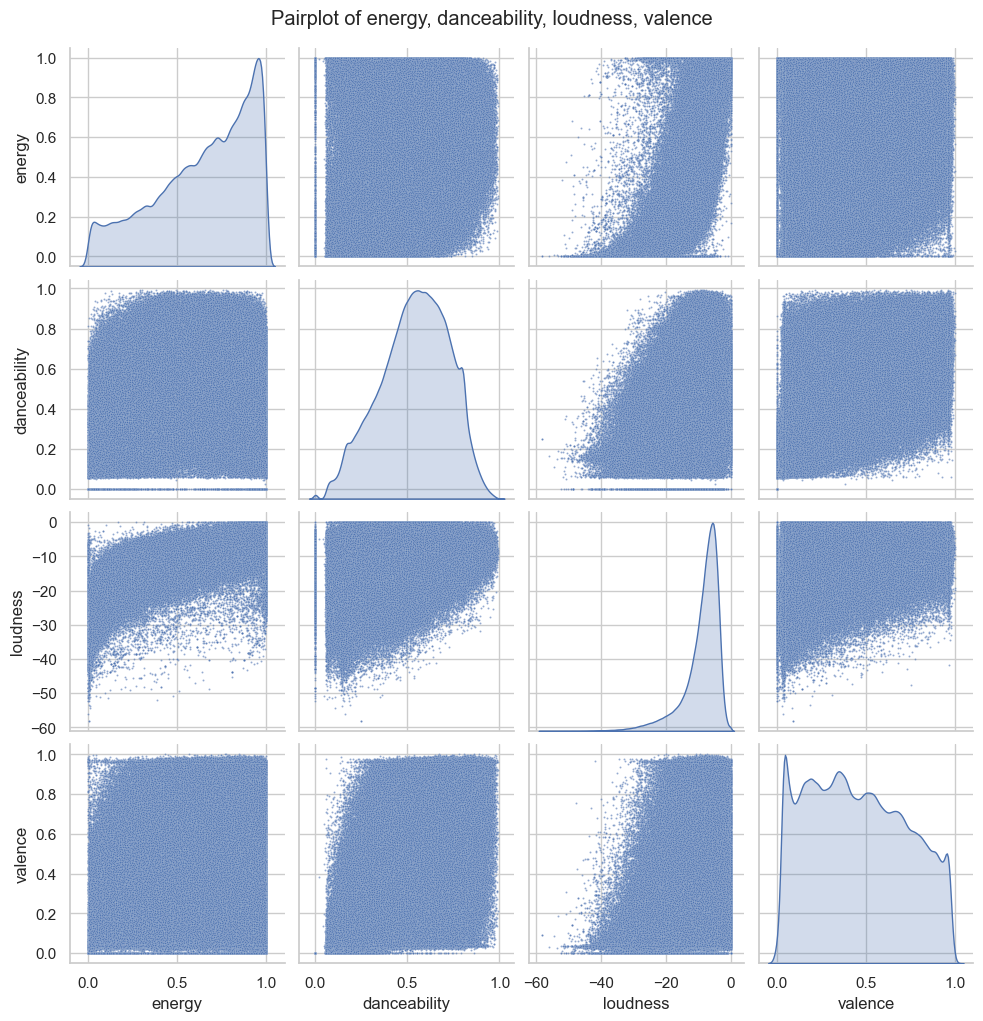

In [10]:
sns.set_theme(style="whitegrid")
pairplot = sns.pairplot(df_to_analyze, diag_kind="kde", plot_kws={'alpha': 0.6, 's': 2})

pairplot.fig.suptitle(f"Pairplot of {columns_string}", y=1.02)

plt.show()


Text(0.5, 1.0, 'Correlation Matrix of energy, danceability, loudness, valence')

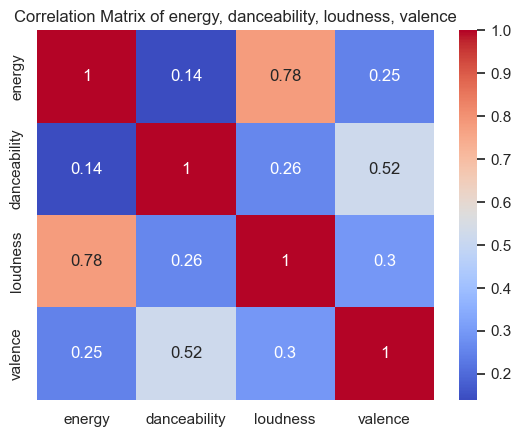

In [11]:
correlation_matrix = df_to_analyze.corr()
corr = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
corr.set_title(f"Correlation Matrix of {columns_string}")

#### Сделайте общий вывод о том, зависит ли настроение трека (Valence) от проанализированных параметров:
**Результат**: Текстовый ответ на вопрос.

Удобнее всего использовать для такого анализа матрицу корреляций. В данном случае `Valence` больше всего коррелирует с `Danseability`. `Energy` и `Loudness` влияют на `Valence` заметно меньше.

По pairplot можно заметить,что настроение трека растет с увеличеничем громкости и где-то после -25 дб сильно не меняется.

### 2. С годами музыка становится дольше или быстрее?

**Результат**: Код, реализующий графики:

- Зависимость средней продолжительности трека от года, с линией тренда
- Изменение средней продолжительности топ-5 самых длинных треков года
- Изменение средней продолжительности топ-5 самых коротких треков года

Каждый график должен иметь название, подписанные оси и, при необходимости, легенду.

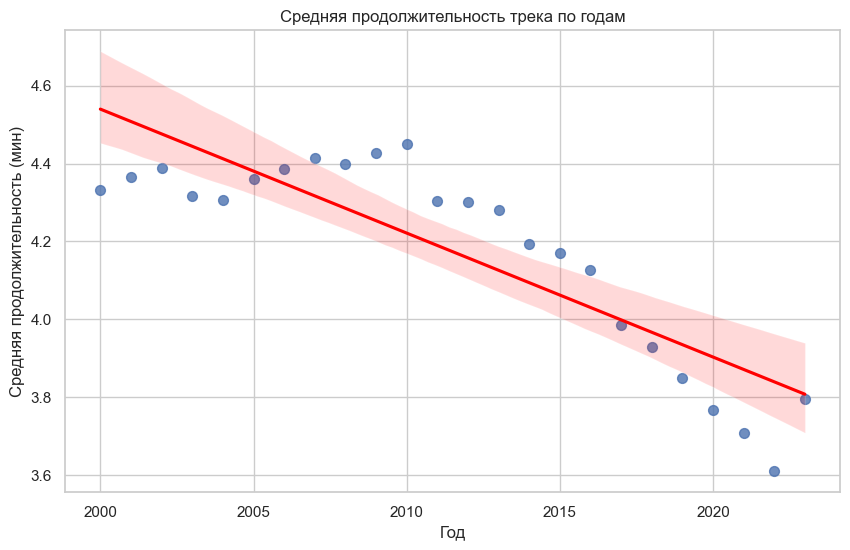

In [12]:
df['duration_min'] = df['duration_ms'] / 60000

avg_duration_by_year = (
    df.groupby('year')['duration_min']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.regplot(data=avg_duration_by_year, x='year', y='duration_min', scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Средняя продолжительность трека по годам')
plt.xlabel('Год')
plt.ylabel('Средняя продолжительность (мин)')
plt.grid(True)
plt.show()

/var/folders/5n/x5mny29d1t16fq8lylrw5xn80000gn/T/ipykernel_46576/1091023783.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'duration_min')['duration_min'].mean())


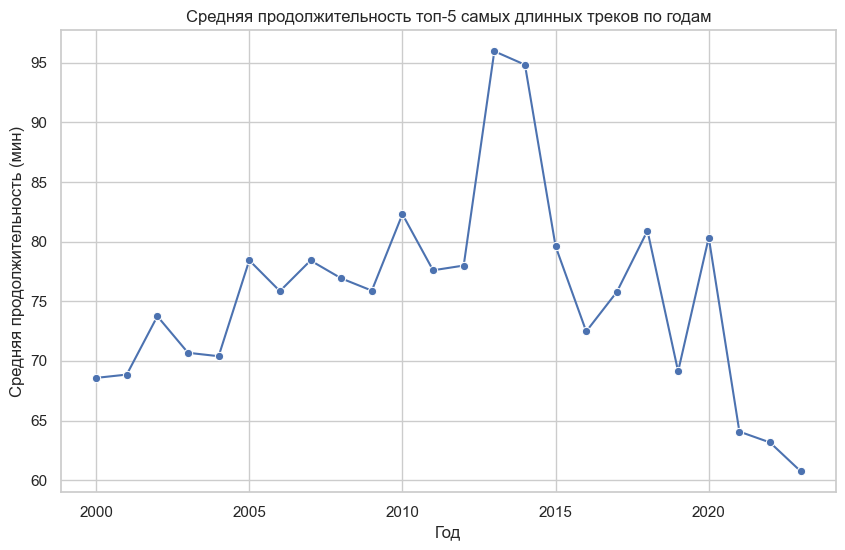

In [13]:
top_5_longest = (
    df.groupby('year')
    .apply(lambda x: x.nlargest(5, 'duration_min')['duration_min'].mean())
    .reset_index(name='avg_longest')
)

plt.figure(figsize=(10, 6))
sns.lineplot(data=top_5_longest, x='year', y='avg_longest', marker='o')
plt.title('Средняя продолжительность топ-5 самых длинных треков по годам')
plt.xlabel('Год')
plt.ylabel('Средняя продолжительность (мин)')
plt.grid(True)
plt.show()


/var/folders/5n/x5mny29d1t16fq8lylrw5xn80000gn/T/ipykernel_46576/222651403.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nsmallest(5, 'duration_min')['duration_min'].mean())


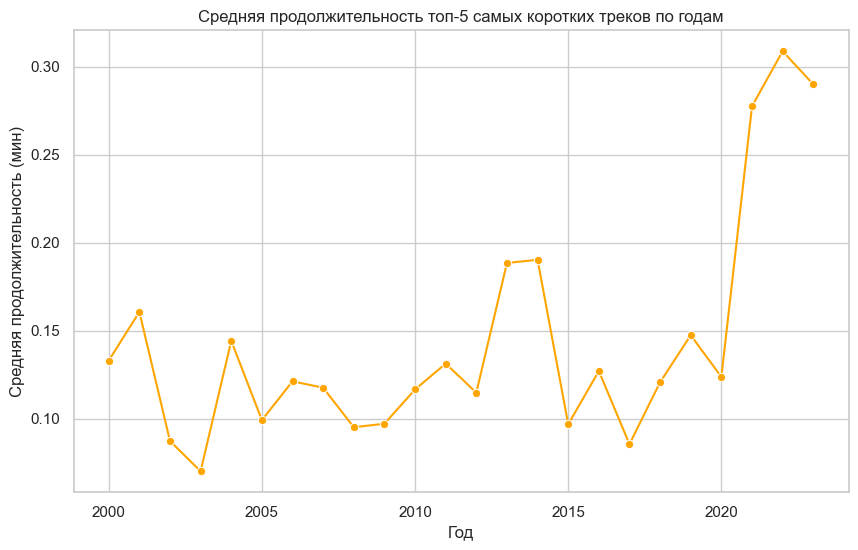

In [14]:
top_5_shortest = (
    df.groupby('year')
    .apply(lambda x: x.nsmallest(5, 'duration_min')['duration_min'].mean())
    .reset_index(name='avg_shortest')
)

plt.figure(figsize=(10, 6))
sns.lineplot(data=top_5_shortest, x='year', y='avg_shortest', color='orange', marker='o')
plt.title('Средняя продолжительность топ-5 самых коротких треков по годам')
plt.xlabel('Год')
plt.ylabel('Средняя продолжительность (мин)')
plt.grid(True)
plt.show()

### 3. Как менялись популярные жанры от 2000 от 2023? 

**Результат**: Код, реализующий график:
- 3 самых популярных по среднему значению жанра каждого года, с подписью значений

График должен иметь название, подписанные оси и подпись значений

**Дополнительно**: Текстовый ответ, какие жанры оказывались в топ-3 чаще всего.

/var/folders/5n/x5mny29d1t16fq8lylrw5xn80000gn/T/ipykernel_46576/1959616902.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, 'popularity'))


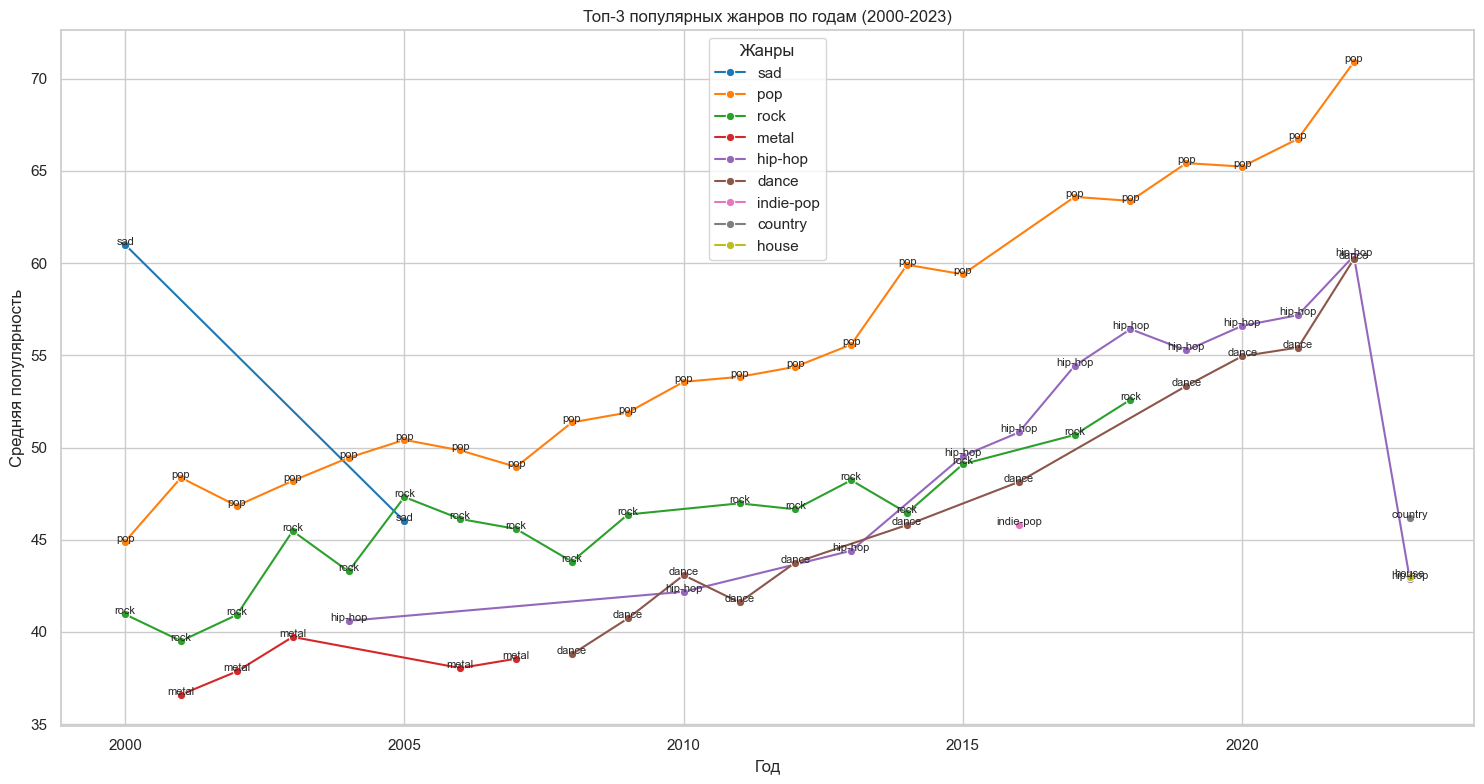

In [15]:
avg_genre_popularity = df.groupby(['year', 'genre'])['popularity'].mean().reset_index()

top_3_genres_by_year = (
    avg_genre_popularity.groupby('year')
    .apply(lambda x: x.nlargest(3, 'popularity'))
    .reset_index(drop=True)
)

plt.figure(figsize=(15, 8))
sns.lineplot(data=top_3_genres_by_year, x='year', y='popularity', hue='genre', marker='o', palette='tab10')

for _, row in top_3_genres_by_year.iterrows():
    plt.text(row['year'], row['popularity'], f"{row['genre']}", fontsize=8, ha='center')

plt.title('Топ-3 популярных жанров по годам (2000-2023)')
plt.xlabel('Год')
plt.ylabel('Средняя популярность')
plt.legend(title='Жанры')
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
top_genre_counts = top_3_genres_by_year['genre'].value_counts()

print("Жанры, которые чаще всего попадали в топ-3 популярных по годам:")
print(top_genre_counts)

Жанры, которые чаще всего попадали в топ-3 популярных по годам:
genre
pop          22
rock         17
hip-hop      12
dance        11
metal         5
sad           2
indie-pop     1
country       1
house         1
Name: count, dtype: int64


### 4. Как связаны между собой Speechiness, Acousticness и Instrumentalness?

**Результат**: Код, реализующий 2 различных по типу графика. Выбранные графики должны наиболее хорошо подходить для описания зависимости между указанными параметрами.

Каждый график должен иметь название, подписанные оси и, при необходимости, легенду.

**Дополнительно**: Текстовый ответ, почему были выбраны именно такие графики.

In [17]:
columns_to_analyze4 = ['speechiness', 'acousticness', 'instrumentalness']
df_to_analyze4 = df[columns_to_analyze4].copy()
str_columns = ", ".join(columns_to_analyze4)

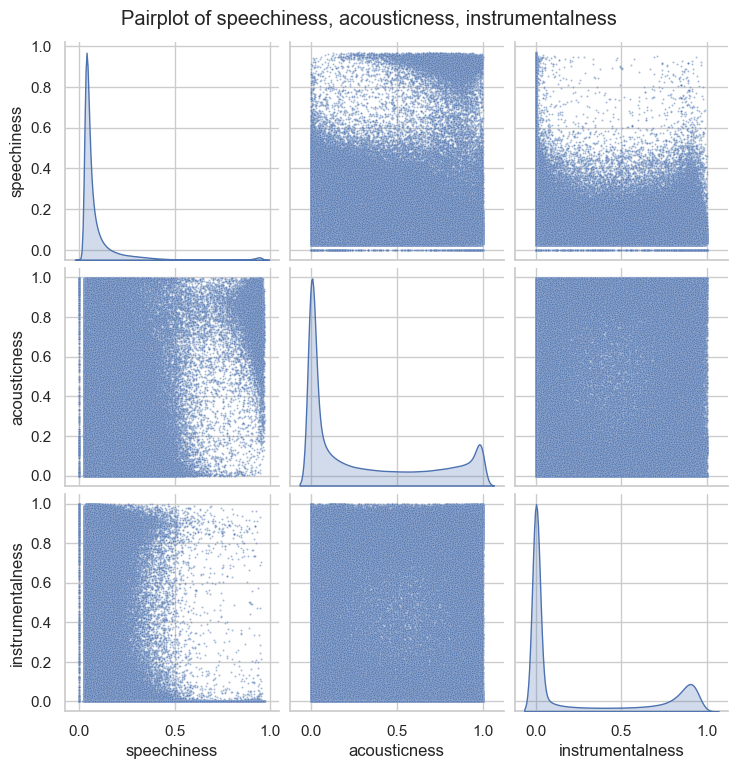

In [18]:
sns.set_theme(style="whitegrid")
pairplot = sns.pairplot(df_to_analyze4, diag_kind="kde", plot_kws={'alpha': 0.5, 's': 2})
pairplot.fig.suptitle(f"Pairplot of {str_columns}",y=1.02)
plt.show()


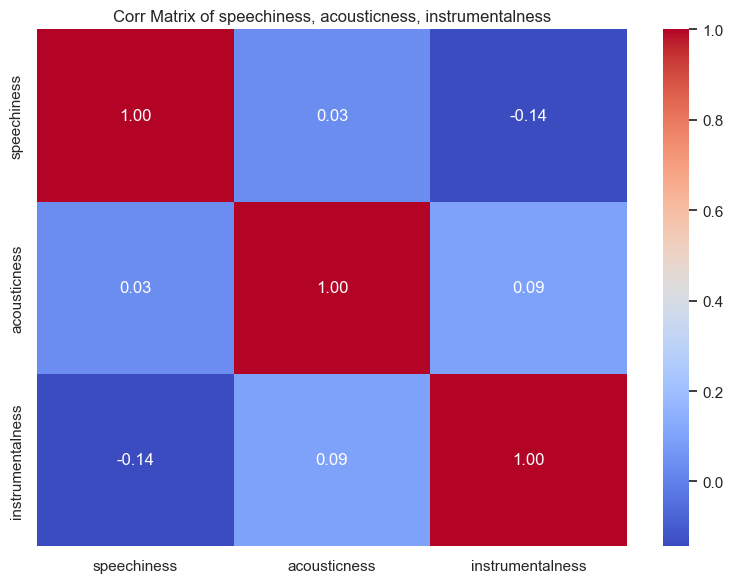

In [19]:
correlation_matrix = df_to_analyze4.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title(f"Corr Matrix of {str_columns}")
plt.tight_layout()
plt.show()

### 5. Какое влияние размер и лад оказывают на популярность в разных жанрах?

**Результат**: Код, реализующий фигуру:

- Жанры для сравнения: deep-house, funk, forro, dancehall, house.
- Точечный график для каждого жанра, отражающий среднюю популярность в зависимости от размера (time_signature) и лада (mode).

Фигура должна иметь название и легенду, каждый график имеет подписанные оси и название.

In [20]:
selected_genres = ['deep-house', 'funk', 'forro', 'dancehall', 'house']
df_filtered = df[df['genre'].isin(selected_genres)]

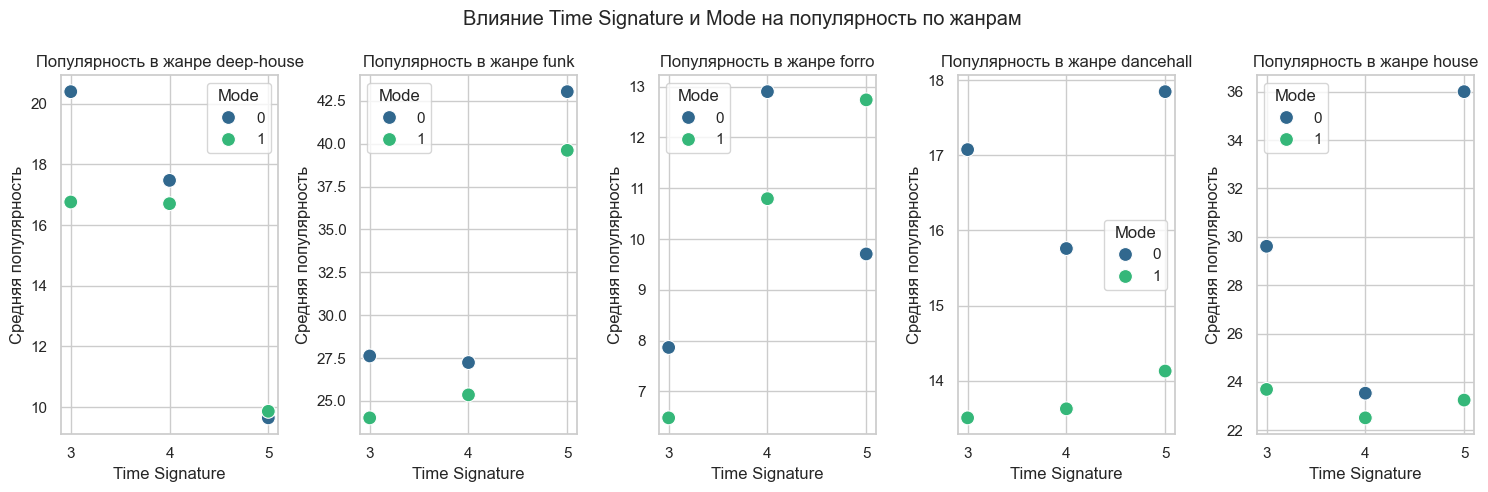

In [21]:
avg_popularity = df_filtered.groupby(['genre', 'time_signature', 'mode'])['popularity'].mean().reset_index()

fig, axs = plt.subplots(1,5, figsize=(15, 5))
axs = axs.flatten()

for i, genre in enumerate(selected_genres):
    genre_data = avg_popularity[avg_popularity['genre'] == genre]
    sns.scatterplot(
        data=genre_data,
        x='time_signature',
        y='popularity',
        hue='mode',
        palette='viridis',
        s=100,
        ax=axs[i]
    )
    axs[i].set_title(f"Популярность в жанре {genre}")
    axs[i].set_xlabel("Time Signature")
    axs[i].set_ylabel("Средняя популярность")
    axs[i].legend(title="Mode")
 
fig.suptitle("Влияние Time Signature и Mode на популярность по жанрам")
plt.tight_layout()
plt.show()


In [22]:
df['time_signature'].sort_values().unique()

array([3, 4, 5])

### 6. Как выглядят графики плотности распределения, построенные для темпа по уникальным значениям размера трека? Как выглядят графики плотности нормальных распределений по этим данным?
**Результат**: Код, реализующий графики распределения темпа (tempo) для всех уникальных значений размера трека (time_signature).

Фигура должна иметь название и легенду. Плотности распределения должны быть построены либо на одном графике, либо на нескольких графиках, но в рамках одной фигуры. Плотности нормального распределения должны быть построены в одной на одном графике с плотностью распределения tempo.

**Дополнительно**: Код с ответом на вопрос, какие параметры (среднее и разброс) для нормальных распределений темпа для размера трека.

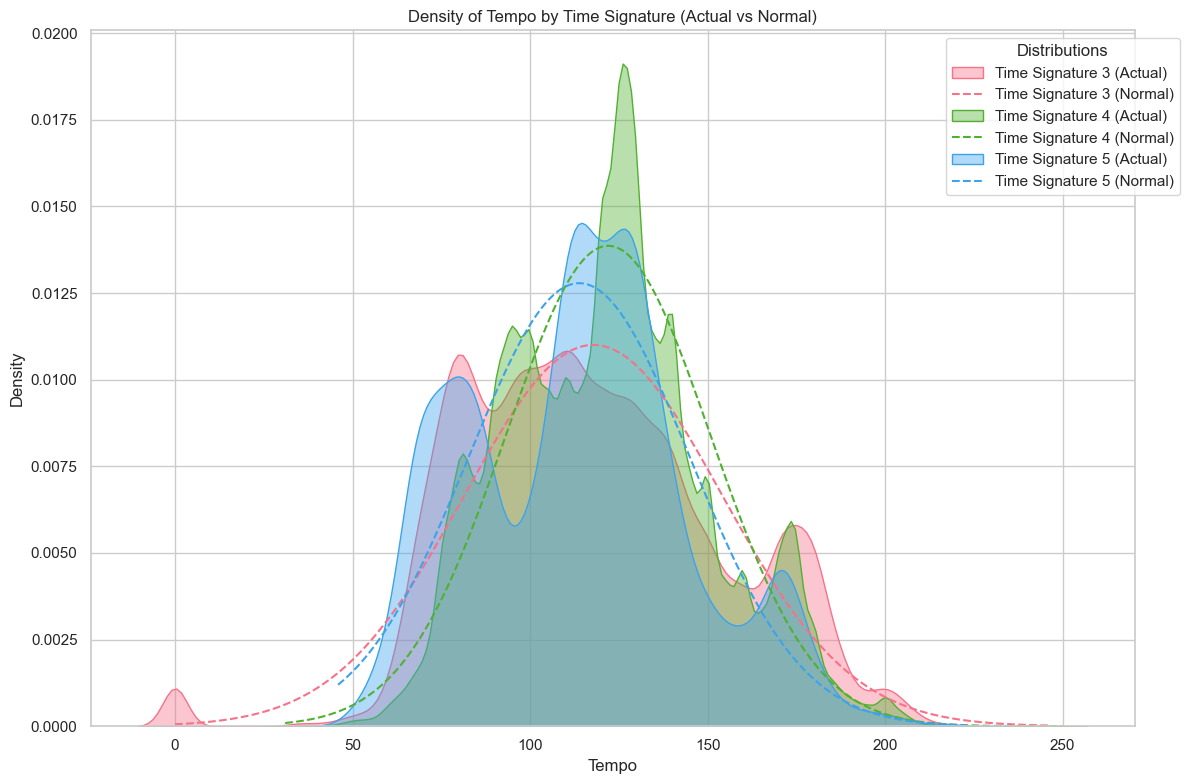

In [23]:
unique_time_signatures = df['time_signature'].unique()

plt.figure(figsize=(12, 8))
colors = sns.color_palette("husl", len(unique_time_signatures))

for i, ts in enumerate(unique_time_signatures):
    subset = df[df['time_signature'] == ts]
    
    mean_tempo = subset['tempo'].mean()
    std_tempo = subset['tempo'].std()
    
    sns.kdeplot(subset['tempo'], label=f"Time Signature {ts} (Actual)", color=colors[i], fill=True, alpha=0.4)
    
    x = np.linspace(subset['tempo'].min(), subset['tempo'].max(), 500)
    normal_density = norm.pdf(x, mean_tempo, std_tempo)
    plt.plot(x, normal_density, linestyle='--', label=f"Time Signature {ts} (Normal)", color=colors[i])

plt.title("Density of Tempo by Time Signature (Actual vs Normal)")
plt.xlabel("Tempo")
plt.ylabel("Density")
plt.legend(title="Distributions", bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
print("Среднее и стандартное отклонение темпа по значениям Time Signature:")
for ts in unique_time_signatures:
    subset = df[df['time_signature'] == ts]
    mean_tempo = subset['tempo'].mean()
    std_tempo = subset['tempo'].std()
    print(f"Time Signature {ts}: Среднее = {mean_tempo:.2f}, Стандартное отклонение = {std_tempo:.2f}")

Среднее и стандартное отклонение темпа по значениям Time Signature:
Time Signature 3: Среднее = 117.80, Стандартное отклонение = 36.26
Time Signature 4: Среднее = 122.00, Стандартное отклонение = 28.78
Time Signature 5: Среднее = 113.83, Стандартное отклонение = 31.21


### 7. Проанализируйте популярность одного артиста (группы) с 10-100 треками на Ваш выбор. 

**Результат**: Код, реализующий следующие графики:

- График, отражающий динамику суммарной популярности артиста год от года. Укажите стрелками с подписями, благодаря каким треками артист был на пике и на дне популярности.
- Сопоставьте признаки для этих двух треков, в виде графиков на Ваш выбор. Укажите, какие из признаков вероятнее всего оказали наибольшее влияние на популярность выбранных треков.

Графики должны находится в одной фигуре, имеющей название. Каждый график должен иметь название, подписанные оси и, при необходимости, легенду.

***Arctic Monkeys***

In [25]:
df[df["artist_name"] == "Arctic Monkeys"].sort_values("popularity", ascending=False)

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,duration_min
77591,Arctic Monkeys,I Wanna Be Yours,5XeFesFbtLpXzIVDNQP22n,91,2013,garage,0.464,0.417,0,-9.345,0,0.0256,0.136000,0.022000,0.0974,0.479,67.528,183956,4,3.065933
77593,Arctic Monkeys,Do I Wanna Know?,5FVd6KXrgO9B3JPmC8OPst,86,2013,garage,0.548,0.532,5,-7.596,1,0.0323,0.186000,0.000263,0.2170,0.405,85.030,272394,4,4.539900
77592,Arctic Monkeys,Why'd You Only Call Me When You're High?,086myS9r57YsLbJpU0TgK9,85,2013,garage,0.691,0.631,2,-6.478,1,0.0368,0.048300,0.000011,0.1040,0.800,92.004,161124,4,2.685400
1145378,Arctic Monkeys,505,58ge6dfP91o9oXMzq3XkIS,80,2007,garage,0.520,0.852,0,-5.866,1,0.0543,0.002370,0.000058,0.0733,0.234,140.267,253587,4,4.226450
77594,Arctic Monkeys,Snap Out Of It,0NdTUS4UiNYCNn5FgVqKQY,78,2013,garage,0.728,0.638,5,-6.455,0,0.0336,0.249000,0.000000,0.1160,0.872,130.014,193030,4,3.217167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145461,Arctic Monkeys,The Death Ramps,5zgmv9KgmUXVERK5a1Rn0l,26,2007,garage,0.350,0.806,7,-6.106,1,0.0346,0.000042,0.808000,0.0939,0.539,160.846,201173,4,3.352883
23911,Arctic Monkeys,Come Together,3BDNq5YfqXC1riRIwWFLEr,25,2012,garage,0.392,0.565,9,-9.579,0,0.0317,0.084000,0.020800,0.1220,0.314,172.695,187773,4,3.129550
1428296,Arctic Monkeys,I.D.S.T.,5k3M875vHLo0N9V2tJuO4l,25,2011,garage,0.320,0.815,9,-2.293,0,0.0576,0.142000,0.000000,0.1070,0.408,80.048,108520,4,1.808667
23852,Arctic Monkeys,Black Treacle,1CJqt2quy88YYx4D3NfLZN,24,2012,garage,0.343,0.890,7,-5.759,1,0.0655,0.000821,0.000000,0.0912,0.525,100.061,217440,4,3.624000


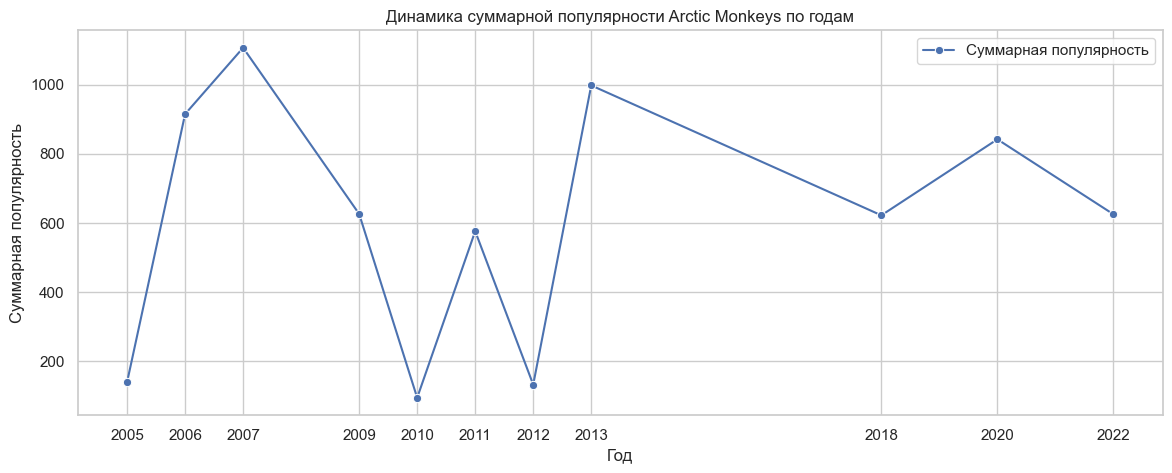

In [26]:
artist_name = "Arctic Monkeys"
artist_data = df[df['artist_name'] == artist_name]

popularity_by_year = artist_data.groupby('year')['popularity'].sum().reset_index()

most_popular_track = artist_data.loc[artist_data['popularity'].idxmax()]
least_popular_track = artist_data.loc[artist_data['popularity'].idxmin()]

plt.figure(figsize=(14, 5))
sns.lineplot(data=popularity_by_year, x='year', y='popularity', marker='o', label="Суммарная популярность")
plt.title(f"Динамика суммарной популярности {artist_name} по годам")
plt.xlabel("Год")
plt.ylabel("Суммарная популярность")
plt.xticks(popularity_by_year['year'])
plt.grid(True)

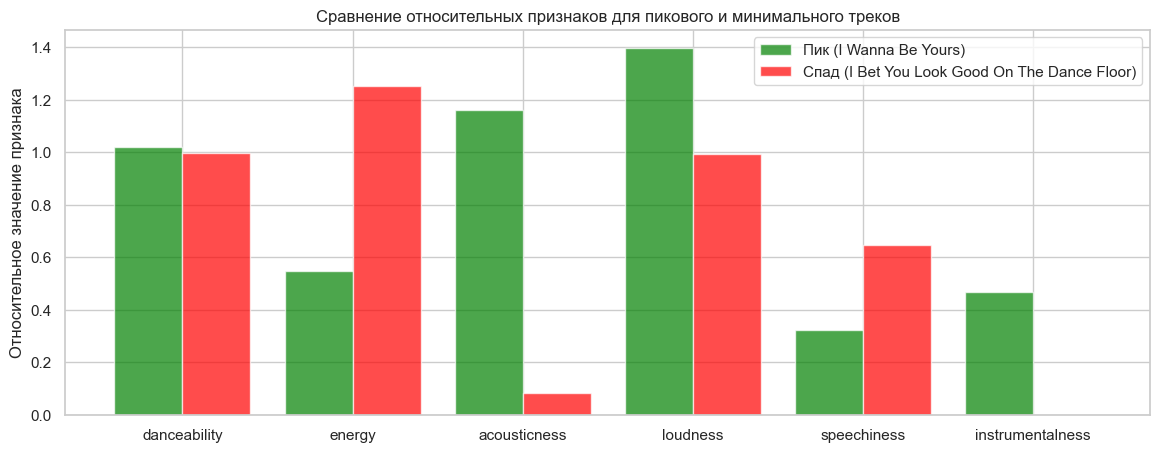

In [30]:
features = ['danceability', 'energy', 'acousticness', 'loudness', 'speechiness', 'instrumentalness']

most_popular_features = most_popular_track[features] / artist_data[features].mean()
least_popular_features = least_popular_track[features] / artist_data[features].mean()

plt.figure(figsize=(14, 5))
x = range(len(features))
plt.bar(x, most_popular_features, width=0.4, label=f"Пик ({most_popular_track['track_name']})", align='center', color='green', alpha=0.7)
plt.bar([i + 0.4 for i in x], least_popular_features, width=0.4, label=f"Спад ({least_popular_track['track_name']})", align='center', color='red', alpha=0.7)
plt.xticks([i + 0.2 for i in x], features)
plt.title("Сравнение относительных признаков для пикового и минимального треков")
plt.ylabel("Относительное значение признака")
plt.legend()
plt.show()


In [31]:
print("Трек с максимальной популярностью:")
print(most_popular_track[['track_name', 'year', 'popularity'] + features])
print("\nТрек с минимальной популярностью:")
print(least_popular_track[['track_name', 'year', 'popularity'] + features])

Трек с максимальной популярностью:
track_name          I Wanna Be Yours
year                            2013
popularity                        91
danceability                   0.464
energy                         0.417
acousticness                   0.136
loudness                      -9.345
speechiness                   0.0256
instrumentalness               0.022
Name: 77591, dtype: object

Трек с минимальной популярностью:
track_name          I Bet You Look Good On The Dance Floor
year                                                  2012
popularity                                              13
danceability                                         0.454
energy                                               0.952
acousticness                                       0.00986
loudness                                            -6.646
speechiness                                         0.0509
instrumentalness                                  0.000014
Name: 24011, dtype: object


In [32]:
popularity_by_year

,year,popularity
0,2005,139
1,2006,915
2,2007,1107
3,2009,626
4,2010,94
5,2011,576
6,2012,132
7,2013,998
8,2018,622
9,2020,842


In [33]:
# data_2013 = df[(df['year'] == most_popular_track['year']) & (df['genre'] == most_popular_track['genre'])]
data_2013 = df[df['year'] == most_popular_track['year']]
data_2013.sort_values('popularity', ascending=False).head(25)


,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,duration_min
77591,Arctic Monkeys,I Wanna Be Yours,5XeFesFbtLpXzIVDNQP22n,91,2013,garage,0.464,0.417,0,-9.345,0,0.0256,0.136000,0.022000,0.0974,0.479,67.528,183956,4,3.065933
77593,Arctic Monkeys,Do I Wanna Know?,5FVd6KXrgO9B3JPmC8OPst,86,2013,garage,0.548,0.532,5,-7.596,1,0.0323,0.186000,0.000263,0.2170,0.405,85.030,272394,4,4.539900
77592,Arctic Monkeys,Why'd You Only Call Me When You're High?,086myS9r57YsLbJpU0TgK9,85,2013,garage,0.691,0.631,2,-6.478,1,0.0368,0.048300,0.000011,0.1040,0.800,92.004,161124,4,2.685400
66269,Avicii,Wake Me Up,0nrRP2bk19rLc0orkWPQk2,84,2013,dance,0.532,0.783,2,-5.697,1,0.0523,0.003800,0.001200,0.1610,0.643,124.080,247427,4,4.123783
93570,John Legend,All of Me,3U4isOIWM3VvDubwSI3y7a,83,2013,pop,0.422,0.264,8,-7.064,1,0.0322,0.922000,0.000000,0.1320,0.331,119.930,269560,4,4.492667
93566,PARTYNEXTDOOR,Break from Toronto,5fEB6ZmVkg63GZg9qO86jh,81,2013,pop,0.595,0.678,9,-5.180,1,0.0335,0.019900,0.003890,0.4180,0.259,117.067,99213,4,1.653550
93567,Lana Del Rey,Young And Beautiful,2nMeu6UenVvwUktBCpLMK9,81,2013,pop,0.324,0.416,11,-8.920,0,0.0368,0.262000,0.000037,0.1100,0.151,113.986,236053,4,3.934217
97060,Capital Cities,Safe And Sound,6Z8R6UsFuGXGtiIxiD8ISb,81,2013,rock,0.655,0.819,0,-4.852,1,0.0316,0.000176,0.003740,0.1040,0.766,117.956,192790,5,3.213167
93572,One Direction,Story of My Life,4nVBt6MZDDP6tRVdQTgxJg,81,2013,pop,0.600,0.663,3,-5.802,1,0.0477,0.225000,0.000000,0.1190,0.286,121.070,245493,4,4.091550
93574,Miley Cyrus,Wrecking Ball,2vwlzO0Qp8kfEtzTsCXfyE,80,2013,pop,0.530,0.422,5,-6.262,1,0.0342,0.407000,0.000000,0.1070,0.349,119.964,221360,4,3.689333


***Mac DeMarco***

In [34]:
df[df["artist_name"] == "Mac DeMarco"].sort_values("popularity", ascending=False)

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,duration_min
125809,Mac DeMarco,Chamber Of Reflection,7H7NyZ3G075GqPx2evsfeb,82,2014,edm,0.538,0.557,11,-8.678,1,0.0914,0.26200,0.91400,0.102,0.5060,131.030,231724,4,3.862067
271174,Mac DeMarco,For the First Time,2R4AlwtrrkMaRKojcTIzmL,81,2017,edm,0.551,0.529,5,-10.469,0,0.0517,0.29600,0.00930,0.178,0.5210,75.515,182307,4,3.038450
18491,Mac DeMarco,My Kind of Woman,6jgkEbmQ2F2onEqsEhiliL,79,2012,edm,0.501,0.765,6,-7.063,0,0.0281,0.00294,0.49000,0.184,0.4600,91.771,190846,4,3.180767
18492,Mac DeMarco,Freaking Out the Neighborhood,3HlK8txWAdtKMrbsqX40pl,74,2012,edm,0.565,0.832,8,-5.751,0,0.1080,0.06380,0.02880,0.386,0.8470,143.303,173889,4,2.898150
271175,Mac DeMarco,Moonlight on the River,2fhOljbX79loRcdl47SFye,74,2017,edm,0.662,0.478,9,-8.631,1,0.0451,0.25200,0.83300,0.216,0.4300,139.980,422613,4,7.043550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72426,Mac DeMarco,Eating Like A Kid,2SiUmToMnKN8z5NSDtEh7H,31,2013,edm,0.491,0.241,8,-21.014,0,0.0364,0.79900,0.05590,0.939,0.0879,102.676,185133,4,3.085550
125979,Mac DeMarco,Potato Boy,34PsmS9BrFycYB7kIBcjRp,30,2014,edm,0.240,0.702,7,-7.364,1,0.0725,0.58200,0.83900,0.103,0.6430,164.827,166933,4,2.782217
231008,Mac DeMarco,Zhe Doan #1,2pfj388Kse6sjNWvyyXVfP,30,2016,edm,0.654,0.403,11,-12.185,0,0.0276,0.77800,0.06960,0.338,0.4530,83.045,149044,4,2.484067
230985,Mac DeMarco,Rick's New Haircut #2,33DAsY6A2pAzKTLmTVrkxI,30,2016,edm,0.508,0.646,2,-8.939,0,0.0871,0.71500,0.91000,0.111,0.7340,173.832,202800,4,3.380000


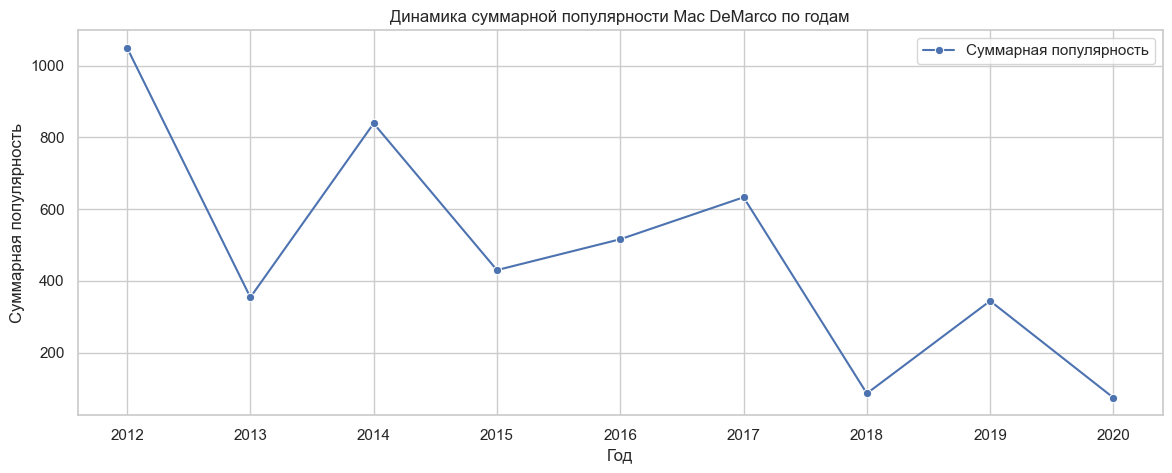

In [35]:
artist_name_new = "Mac DeMarco"
artist_data_new = df[df['artist_name'] == artist_name_new]

popularity_by_year_new = artist_data_new.groupby('year')['popularity'].sum().reset_index()

most_popular_track_new = artist_data_new.loc[artist_data_new['popularity'].idxmax()]
least_popular_track_new = artist_data_new.loc[artist_data_new['popularity'].idxmin()]

plt.figure(figsize=(14, 5))
sns.lineplot(data=popularity_by_year_new, x='year', y='popularity', marker='o', label="Суммарная популярность")
plt.title(f"Динамика суммарной популярности {artist_name_new} по годам")
plt.xlabel("Год")
plt.ylabel("Суммарная популярность")
plt.xticks(popularity_by_year_new['year'])
plt.grid(True)

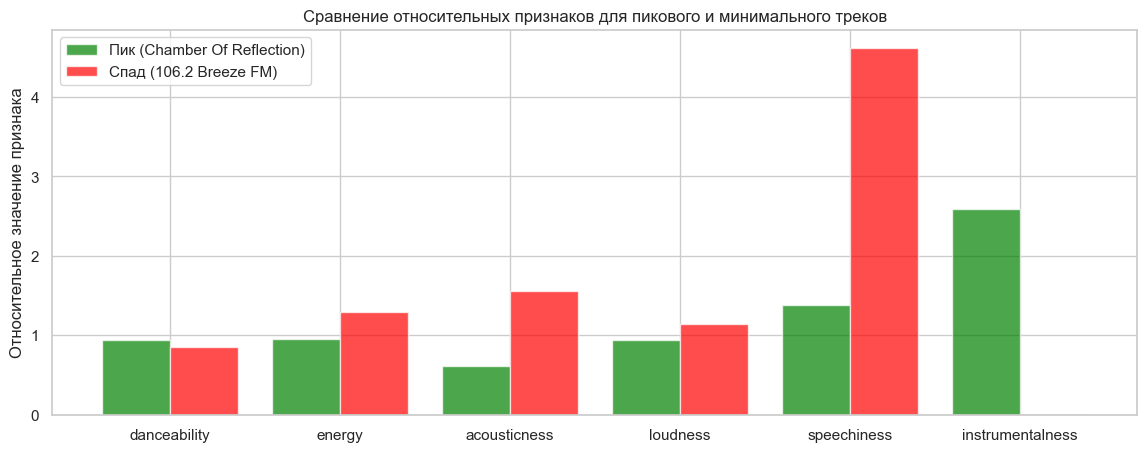

In [36]:
features = ['danceability', 'energy', 'acousticness', 'loudness', 'speechiness', 'instrumentalness']

most_popular_features_new = most_popular_track_new[features] / artist_data_new[features].mean()
least_popular_features_new = least_popular_track_new[features] / artist_data_new[features].mean()

plt.figure(figsize=(14, 5))
x = range(len(features))
plt.bar(x, most_popular_features_new, width=0.4, label=f"Пик ({most_popular_track_new['track_name']})", align='center', color='green', alpha=0.7)
plt.bar([i + 0.4 for i in x], least_popular_features_new, width=0.4, label=f"Спад ({least_popular_track_new['track_name']})", align='center', color='red', alpha=0.7)
plt.xticks([i + 0.2 for i in x], features)
plt.title("Сравнение относительных признаков для пикового и минимального треков")
plt.ylabel("Относительное значение признака")
plt.legend()
plt.show()

In [37]:
print("Трек с максимальной популярностью:")
print(most_popular_track_new[['track_name', 'year', 'popularity'] + features])
print("\nТрек с минимальной популярностью:")
print(least_popular_track_new[['track_name', 'year', 'popularity'] + features])

Трек с максимальной популярностью:
track_name          Chamber Of Reflection
year                                 2014
popularity                             82
danceability                        0.538
energy                              0.557
acousticness                        0.262
loudness                           -8.678
speechiness                        0.0914
instrumentalness                    0.914
Name: 125809, dtype: object

Трек с минимальной популярностью:
track_name          106.2 Breeze FM
year                           2012
popularity                       29
danceability                  0.487
energy                        0.753
acousticness                  0.665
loudness                    -10.533
speechiness                   0.306
instrumentalness            0.00144
Name: 18558, dtype: object


In [38]:
# data_2014 = df[(df['year'] == most_popular_track_new['year']) & (df['genre'] == most_popular_track_new['genre'])]
data_2014 = df[df['year'] == most_popular_track_new['year']]
data_2014.sort_values('popularity', ascending=False).head(7)


,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,duration_min
138937,J. Cole,No Role Modelz,68Dni7IE4VyPkTOH9mRWHr,87,2014,hip-hop,0.690,0.521,10,-8.492,0,0.3390,0.324000,0.00000,0.0534,0.494,100.028,292799,4,4.879983
146771,One Direction,Night Changes,5O2P9iiztwhomNh8xkR9lJ,86,2014,pop,0.672,0.520,8,-7.747,1,0.0353,0.859000,0.00000,0.1150,0.370,120.001,226600,4,3.776667
140597,TV Girl,Lovers Rock,6dBUzqjtbnIa1TwYbyw5CM,85,2014,indie-pop,0.559,0.871,5,-5.338,0,0.0397,0.000008,0.00545,0.0960,0.572,104.970,213920,4,3.565333
146770,Sam Smith,I'm Not The Only One,7795WJLVKJoAyVoOtCWqXN,84,2014,pop,0.677,0.485,5,-5.795,1,0.0361,0.529000,0.00002,0.0766,0.493,82.001,239317,4,3.988617
119670,Avicii,The Nights,0ct6r3EGTcMLPtrXHDvVjc,84,2014,dance,0.527,0.835,6,-5.298,1,0.0433,0.016600,0.00000,0.2490,0.654,125.983,176658,4,2.944300
138938,J. Cole,Wet Dreamz,4tqcoej1zPvwePZCzuAjJd,83,2014,hip-hop,0.495,0.722,6,-8.108,0,0.3570,0.069700,0.00000,0.1130,0.539,175.627,239267,4,3.987783
125809,Mac DeMarco,Chamber Of Reflection,7H7NyZ3G075GqPx2evsfeb,82,2014,edm,0.538,0.557,11,-8.678,1,0.0914,0.262000,0.91400,0.1020,0.506,131.030,231724,4,3.862067
